# Sentiment Analysis of IMDB reviews using Keras and Tensorflow

## Using nltk

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd

In [ ]:
imdb = tfds.load('imdb_reviews',as_supervised=True)
train_data, test_data = imdb['train'], imdb['test']

In [ ]:
training_sentences=[]
training_labels=[]
testing_sentences=[]
testing_labels=[]
for sentence,label in train_data:
    training_sentences.append(str(sentence.numpy()))
    training_labels.append(label.numpy())
for sentence,label in test_data:
    testing_sentences.append(str(sentence.numpy()))
    testing_labels.append(label.numpy())
training_labels=np.array(training_labels)
testing_labels=np.array(testing_labels)

In [ ]:
training_labels[1]

0

In [ ]:
training_sentences[1]

"b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of what was causing them or why. I admit, I may have missed part of the film, but i watched the majority of it and everything just seemed to happen of its own accord without any real concern for anything else. I cant recommend this film at all.'"

In [ ]:
vocab_size=20000
embedding_dim = 32
max_length = 500
trunc_type='post'
oov_tok = "<OOV>"

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [ ]:
word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'br': 8,
 'in': 9,
 'it': 10,
 'i': 11,
 'this': 12,
 'that': 13,
 'was': 14,
 'as': 15,
 'for': 16,
 'with': 17,
 'movie': 18,
 'but': 19,
 'film': 20,
 "'s": 21,
 'on': 22,
 'you': 23,
 'not': 24,
 'are': 25,
 'his': 26,
 'he': 27,
 'have': 28,
 'be': 29,
 'one': 30,
 'all': 31,
 'at': 32,
 'by': 33,
 'they': 34,
 'an': 35,
 'who': 36,
 'so': 37,
 'from': 38,
 'like': 39,
 'her': 40,
 "'t": 41,
 'or': 42,
 'just': 43,
 'there': 44,
 'about': 45,
 'out': 46,
 "'": 47,
 'has': 48,
 'if': 49,
 'some': 50,
 'what': 51,
 'good': 52,
 'more': 53,
 'very': 54,
 'when': 55,
 'she': 56,
 'up': 57,
 'can': 58,
 'b': 59,
 'time': 60,
 'no': 61,
 'even': 62,
 'my': 63,
 'would': 64,
 'which': 65,
 'story': 66,
 'only': 67,
 'really': 68,
 'see': 69,
 'their': 70,
 'had': 71,
 'were': 72,
 'me': 73,
 'well': 74,
 'we': 75,
 'than': 76,
 'much': 77,
 'been': 78,
 'get': 79,
 'bad': 80,
 'will': 81,
 'people': 82,
 'do': 83,

In [ ]:
training_sequences=tokenizer.texts_to_sequences(training_sentences)
testing_sequences=tokenizer.texts_to_sequences(testing_sentences)

In [ ]:
print(training_sentences[1])

b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of what was causing them or why. I admit, I may have missed part of the film, but i watched the majority of it and everything just seemed to happen of its own accord without any real concern for anything else. I cant recommend this film at all.'


In [ ]:
training_sequences[1]

[256,
 28,
 78,
 585,
 6,
 815,
 2383,
 317,
 109,
 19,
 12,
 7,
 643,
 696,
 6,
 4,
 2249,
 5,
 183,
 599,
 68,
 1483,
 114,
 2289,
 3,
 4005,
 22,
 2,
 1,
 3,
 263,
 43,
 4754,
 4,
 173,
 190,
 22,
 12,
 4126,
 11,
 1604,
 2383,
 87,
 2,
 20,
 14,
 1945,
 2,
 115,
 950,
 14,
 1838,
 1367,
 563,
 3,
 365,
 183,
 477,
 6,
 602,
 19,
 17,
 61,
 1845,
 5,
 51,
 14,
 4090,
 98,
 42,
 138,
 11,
 983,
 11,
 200,
 28,
 1059,
 171,
 5,
 2,
 20,
 19,
 11,
 298,
 2,
 2182,
 5,
 10,
 3,
 285,
 43,
 477,
 6,
 602,
 5,
 94,
 203,
 1,
 206,
 102,
 148,
 4450,
 16,
 228,
 336,
 11,
 2510,
 392,
 12,
 20,
 32,
 31,
 47]

In [ ]:
training_padded=pad_sequences(training_sequences,maxlen=max_length,truncating=trunc_type)

testing_padded=pad_sequences(testing_sequences,maxlen=max_length,truncating=trunc_type)

In [ ]:
model = tf.keras.Sequential([
                    tf.keras.layers.Embedding(vocab_size,    embedding_dim, input_length=max_length),
                    tf.keras.layers.GlobalAveragePooling1D(),
                    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 32)           640000    
_________________________________________________________________
global_average_pooling1d_6 ( (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 640,033
Trainable params: 640,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 20

In [ ]:
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_split= 0.2)

Epoch 1/20
625/625 [==============================] - 7s 12ms/step - loss: 0.0307 - accuracy: 0.9942 - val_loss: 0.4066 - val_accuracy: 0.8832
Epoch 2/20
625/625 [==============================] - 7s 12ms/step - loss: 0.0281 - accuracy: 0.9945 - val_loss: 0.4131 - val_accuracy: 0.8874
Epoch 3/20
625/625 [==============================] - 7s 11ms/step - loss: 0.0257 - accuracy: 0.9955 - val_loss: 0.4248 - val_accuracy: 0.8850
Epoch 4/20
625/625 [==============================] - 7s 11ms/step - loss: 0.0236 - accuracy: 0.9962 - val_loss: 0.4346 - val_accuracy: 0.8872
Epoch 5/20
625/625 [==============================] - 7s 11ms/step - loss: 0.0211 - accuracy: 0.9972 - val_loss: 0.4527 - val_accuracy: 0.8818
Epoch 6/20
625/625 [==============================] - 7s 11ms/step - loss: 0.0194 - accuracy: 0.9970 - val_loss: 0.4608 - val_accuracy: 0.8864
Epoch 7/20
625/625 [==============================] - 7s 11ms/step - loss: 0.0178 - accuracy: 0.9976 - val_loss: 0.4707 - val_accuracy: 0.8860

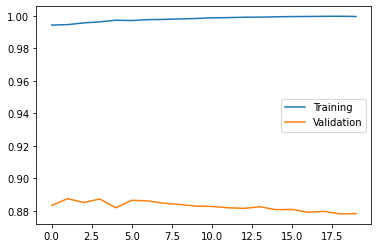

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(num_epochs),history.history['accuracy'],label='Training')
plt.plot(range(num_epochs),history.history['val_accuracy'],label='Validation')
plt.legend()
plt.show()

In [ ]:
loss, acc = model.evaluate(testing_padded, testing_labels)
print('Test accuracy',acc *100)

782/782 [==============================] - 2s 2ms/step - loss: 0.7660 - accuracy: 0.8519
Test accuracy 85.18800139427185
